# INTRODUCTION
Working on Pima Indians Diabetes Dataset from the "Nation Institution of Diabetes and Research "

which tells us about the Diabetes and it's Features of a population.
Diabetes is a chronic disease and a major challenge across the world as it might leads to other diseases.There are certain populations which are very prone to different diseases in comparison to other populations.

In our Dataset we have the details of a population having Diabetes or Not and it's variables
as  **Pregnancies**, **Glucose**,**Blood Pressure**,**Skin Thickness**,**Insulin**,**BMI**, **Diabetes Pedigree Function**, **Age**, **Outcome**

# OBJECTIVE
 
 We will explore tha Data first and then perform some feature engineering techniques such as 
 
* Data pre-processing,
* Data Manipulation,
* Dealing with MissingValues 
* Handling OUtliers 
* Imputation 
* Encoding and 
* Some Data Visualization

In [423]:
import pandas as pd
import numpy as np 
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [424]:
Diabetes_full = pd.read_excel("/content/Diabetes.xlsx")
Diabetes_full

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [425]:
Diabetes_full.columns=["Pregnancies","Glucose","Blood Pressure","Skin Thickness","Insulin","BMI","Diabetes Pedigree Function","Age","Outcome"]
# Correcting the necessary column names 

# Data Exploratiopn

In [426]:
Diabetes_full.head()
# To get top 5 rows

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [427]:
Diabetes_full.tail()
# To get bottom 5 rows

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [428]:
Diabetes_full.shape    # Will give us the no of rows and columns

(768, 9)

There are 768 rows and 9 columns

In [429]:
Diabetes_full.info()
# Will give us the info of all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood Pressure              768 non-null    int64  
 3   Skin Thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Diabetes Pedigree Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


As we see no Nan values present in the data
*  We can see that all the variables are Numerical 
*  But we should not treat the Outcome variable as Numerical as it was an encoded column

So converting Outcome datatype to category

In [430]:
Diabetes_full["Outcome"]=Diabetes_full["Outcome"].astype("category")
# Convereting type of Outcome to category

In [431]:
Diabetes_full.describe(include="all")
# Will give the statistical measures

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,NaN
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,NaN
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,NaN
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,NaN
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,NaN


From the above we can see that No Null values present 

and we can see the minimun value as 0 in Pregnancies","Glucose","Blood Pressure","Skin Thickness","Insulin","BMI"  which will affect the statistical measures

In [432]:
Diabetes_full.eq(0).sum()
# To get 0's present in Data

Pregnancies                   111
Glucose                         5
Blood Pressure                 35
Skin Thickness                227
Insulin                       374
BMI                            11
Diabetes Pedigree Function      0
Age                             0
Outcome                       500
dtype: int64

As we see there are some "0"'s present in the data, but should not consider the pregnancies column as there are chances that women not being pregnant and also Out come column as it was an encoded column.

In [433]:
Diabetes_full[["Glucose","Blood Pressure","Skin Thickness","Insulin","BMI","Diabetes Pedigree Function","Age"]]=Diabetes_full[["Glucose","Blood Pressure","Skin Thickness","Insulin","BMI","Diabetes Pedigree Function","Age"]].replace(0,np.nan)

 Replacing the 0 's in Dataset except for Pregnencies and for Outcome column as Missing values

In [434]:
Diabetes_full

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


Replaced the "0"'s with Nan 

In [435]:
Diabetes_full.isnull().sum()
# To get the sum of Null Values

Pregnancies                     0
Glucose                         5
Blood Pressure                 35
Skin Thickness                227
Insulin                       374
BMI                            11
Diabetes Pedigree Function      0
Age                             0
Outcome                         0
dtype: int64

In [436]:
Diabetes_full.isnull().mean()*100
# To get % of Null values

Pregnancies                    0.000000
Glucose                        0.651042
Blood Pressure                 4.557292
Skin Thickness                29.557292
Insulin                       48.697917
BMI                            1.432292
Diabetes Pedigree Function     0.000000
Age                            0.000000
Outcome                        0.000000
dtype: float64

We can observe that Skin Thickness and Insulin column has more than 30% - 40% missing with which we cannot get the accurate results.

In [437]:
Diabetes_full.describe(include="all")

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,NaN
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,NaN
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,NaN
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,NaN
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,NaN
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,NaN


As we have seen before that most of the variables having 0's as minimum values are now changed because of which statistical measures have also been changed

In [438]:
Diabetes_full[Diabetes_full["Pregnancies"]==0]

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
16,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1
45,0,180.0,66.0,39.0,NaN,42.0,1.893,25,1
57,0,100.0,88.0,60.0,110.0,46.8,0.962,31,0
58,0,146.0,82.0,NaN,NaN,40.5,1.781,44,0
...,...,...,...,...,...,...,...,...,...
713,0,134.0,58.0,20.0,291.0,26.4,0.352,21,0
727,0,141.0,84.0,26.0,NaN,32.4,0.433,22,0
736,0,126.0,86.0,27.0,120.0,27.4,0.515,21,0
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1


As we observe there are some people not being pregnant

In [439]:
Diabetes_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Pregnancies                 768 non-null    int64   
 1   Glucose                     763 non-null    float64 
 2   Blood Pressure              733 non-null    float64 
 3   Skin Thickness              541 non-null    float64 
 4   Insulin                     394 non-null    float64 
 5   BMI                         757 non-null    float64 
 6   Diabetes Pedigree Function  768 non-null    float64 
 7   Age                         768 non-null    int64   
 8   Outcome                     768 non-null    category
dtypes: category(1), float64(6), int64(2)
memory usage: 49.0 KB


Will give us the info of all the columns wheater null and nonnull and dtypes

In [440]:
new_Diabetes_df=Diabetes_full.drop(columns=["Skin Thickness","Insulin"])

Dropped the Skin Thickness,Insulin columns as they have very huge % of missing values

In [441]:
new_Diabetes_df

,Pregnancies,Glucose,Blood Pressure,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101.0,76.0,32.9,0.171,63,0
764,2,122.0,70.0,36.8,0.340,27,0
765,5,121.0,72.0,26.2,0.245,30,0
766,1,126.0,60.0,30.1,0.349,47,1


New Diabetes_df after dropping 2 columns

In [442]:
new_Diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Pregnancies                 768 non-null    int64   
 1   Glucose                     763 non-null    float64 
 2   Blood Pressure              733 non-null    float64 
 3   BMI                         757 non-null    float64 
 4   Diabetes Pedigree Function  768 non-null    float64 
 5   Age                         768 non-null    int64   
 6   Outcome                     768 non-null    category
dtypes: category(1), float64(4), int64(2)
memory usage: 37.0 KB


In [443]:
new_Diabetes_df.isnull().sum()

Pregnancies                    0
Glucose                        5
Blood Pressure                35
BMI                           11
Diabetes Pedigree Function     0
Age                            0
Outcome                        0
dtype: int64

In [444]:
new_Diabetes_df.isnull().mean()*100

Pregnancies                   0.000000
Glucose                       0.651042
Blood Pressure                4.557292
BMI                           1.432292
Diabetes Pedigree Function    0.000000
Age                           0.000000
Outcome                       0.000000
dtype: float64

In [445]:
new_Diabetes_df.drop_duplicates()

,Pregnancies,Glucose,Blood Pressure,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101.0,76.0,32.9,0.171,63,0
764,2,122.0,70.0,36.8,0.340,27,0
765,5,121.0,72.0,26.2,0.245,30,0
766,1,126.0,60.0,30.1,0.349,47,1


In [446]:
new_Diabetes_df["Glucose"].isnull().sum()

5

In [447]:
new_Diabetes_df1=new_Diabetes_df.dropna(subset=["Glucose"])

In [448]:
new_Diabetes_df1

,Pregnancies,Glucose,Blood Pressure,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101.0,76.0,32.9,0.171,63,0
764,2,122.0,70.0,36.8,0.340,27,0
765,5,121.0,72.0,26.2,0.245,30,0
766,1,126.0,60.0,30.1,0.349,47,1


As the Glucose variable having < 1% of miising values therefore dropped those observations

In [449]:
new_Diabetes_df1.isnull().sum()

Pregnancies                    0
Glucose                        0
Blood Pressure                35
BMI                           11
Diabetes Pedigree Function     0
Age                            0
Outcome                        0
dtype: int64

In [450]:
new_Diabetes_df1.isnull().mean()*100
# To know thw % of null data

Pregnancies                   0.000000
Glucose                       0.000000
Blood Pressure                4.587156
BMI                           1.441678
Diabetes Pedigree Function    0.000000
Age                           0.000000
Outcome                       0.000000
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f651baf5910>,
      dtype=object)

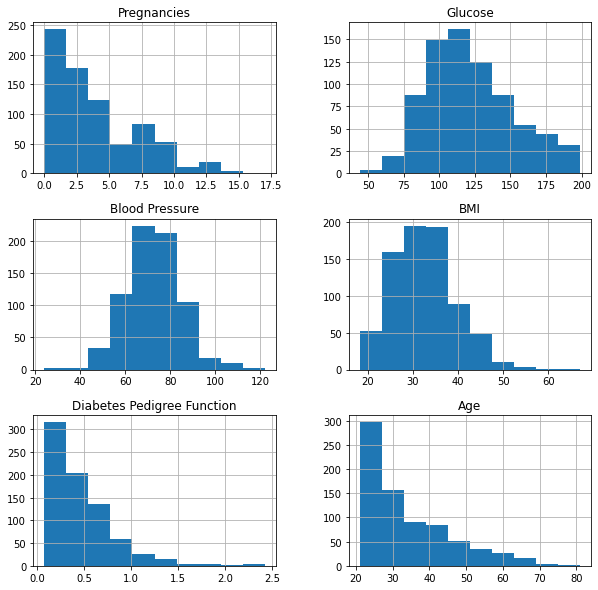

In [451]:
new_Diabetes_df1.hist(figsize=(10,10))

From the above plot we can have a basic idea of the distribution of the data 

# Sperating the Non Diabetic Dataset to deal with missing values and out liers effectively

In [452]:
Non_Diabetic_df=new_Diabetes_df1[new_Diabetes_df1["Outcome"]==0]
Non_Diabetic_df.reset_index(drop=True,inplace=True)
Non_Diabetic_df

,Pregnancies,Glucose,Blood Pressure,BMI,Diabetes Pedigree Function,Age,Outcome
0,1,85.0,66.0,26.6,0.351,31,0
1,1,89.0,66.0,28.1,0.167,21,0
2,5,116.0,74.0,25.6,0.201,30,0
3,10,115.0,NaN,35.3,0.134,29,0
4,4,110.0,92.0,37.6,0.191,30,0
...,...,...,...,...,...,...,...
492,9,89.0,62.0,22.5,0.142,33,0
493,10,101.0,76.0,32.9,0.171,63,0
494,2,122.0,70.0,36.8,0.340,27,0
495,5,121.0,72.0,26.2,0.245,30,0


In [453]:
Non_Diabetic_df.shape

(497, 7)

There are 497 rows and 7 column for Non_Diabetic Dataset

In [454]:
Non_Diabetic_df.isnull().mean()*100

Pregnancies                   0.000000
Glucose                       0.000000
Blood Pressure                3.822938
BMI                           1.810865
Diabetes Pedigree Function    0.000000
Age                           0.000000
Outcome                       0.000000
dtype: float64

In [ ]:
!pip install fancyimpute

**Using KNN Imputation for the missing data in Non_Diabetic_df**

In [456]:
from fancyimpute import KNN
knn_imputer = KNN()
Knn_Non_Diabetic_df = Non_Diabetic_df.copy(deep=True)
Knn_Non_Diabetic_df.iloc[:, :] = knn_imputer.fit_transform(Knn_Non_Diabetic_df)

Imputing row 1/497 with 0 missing, elapsed time: 0.042
Imputing row 101/497 with 0 missing, elapsed time: 0.043
Imputing row 201/497 with 0 missing, elapsed time: 0.045
Imputing row 301/497 with 0 missing, elapsed time: 0.046
Imputing row 401/497 with 0 missing, elapsed time: 0.047


In [457]:
Knn_Non_Diabetic_df

,Pregnancies,Glucose,Blood Pressure,BMI,Diabetes Pedigree Function,Age,Outcome
0,1.0,85.0,66.000000,26.6,0.351,31.0,0.0
1,1.0,89.0,66.000000,28.1,0.167,21.0,0.0
2,5.0,116.0,74.000000,25.6,0.201,30.0,0.0
3,10.0,115.0,75.945789,35.3,0.134,29.0,0.0
4,4.0,110.0,92.000000,37.6,0.191,30.0,0.0
...,...,...,...,...,...,...,...
492,9.0,89.0,62.000000,22.5,0.142,33.0,0.0
493,10.0,101.0,76.000000,32.9,0.171,63.0,0.0
494,2.0,122.0,70.000000,36.8,0.340,27.0,0.0
495,5.0,121.0,72.000000,26.2,0.245,30.0,0.0


In [458]:
Knn_Non_Diabetic_df.isnull().sum()
# To see null values after KNN Imputation

Pregnancies                   0
Glucose                       0
Blood Pressure                0
BMI                           0
Diabetes Pedigree Function    0
Age                           0
Outcome                       0
dtype: int64

**Using MICE Imputation for Non_Diabetics Data**

In [459]:
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
MICE_Non_Diabetic_df = Non_Diabetic_df.copy(deep=True)
MICE_Non_Diabetic_df.iloc[:, :] = MICE_imputer.fit_transform(MICE_Non_Diabetic_df)

In [460]:
MICE_Non_Diabetic_df

,Pregnancies,Glucose,Blood Pressure,BMI,Diabetes Pedigree Function,Age,Outcome
0,1.0,85.0,66.000000,26.6,0.351,31.0,0.0
1,1.0,89.0,66.000000,28.1,0.167,21.0,0.0
2,5.0,116.0,74.000000,25.6,0.201,30.0,0.0
3,10.0,115.0,73.304193,35.3,0.134,29.0,0.0
4,4.0,110.0,92.000000,37.6,0.191,30.0,0.0
...,...,...,...,...,...,...,...
492,9.0,89.0,62.000000,22.5,0.142,33.0,0.0
493,10.0,101.0,76.000000,32.9,0.171,63.0,0.0
494,2.0,122.0,70.000000,36.8,0.340,27.0,0.0
495,5.0,121.0,72.000000,26.2,0.245,30.0,0.0


In [461]:
MICE_Non_Diabetic_df.isnull().sum()
# To check the null values after MICE Imputation

Pregnancies                   0
Glucose                       0
Blood Pressure                0
BMI                           0
Diabetes Pedigree Function    0
Age                           0
Outcome                       0
dtype: int64

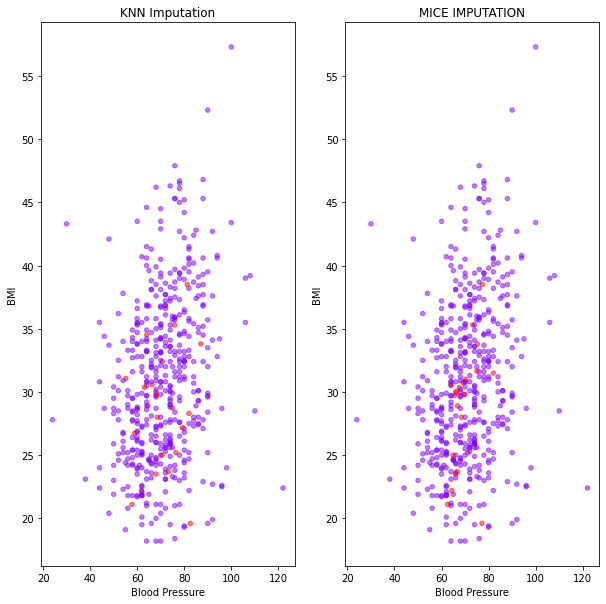

In [462]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
nullity =Non_Diabetic_df['Blood Pressure'].isnull() + Non_Diabetic_df['BMI'].isnull()
imputations = {'KNN Imputation': Knn_Non_Diabetic_df,
               'MICE IMPUTATION':MICE_Non_Diabetic_df}

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(x='Blood Pressure', y='BMI', kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
                             colorbar=False, title=df_key)

By comparing the KNN and Mice Imputations it seems that for both the approaches the data was spread similarly.

Hence we can choose any of them

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f651be95730>,
      dtype=object)

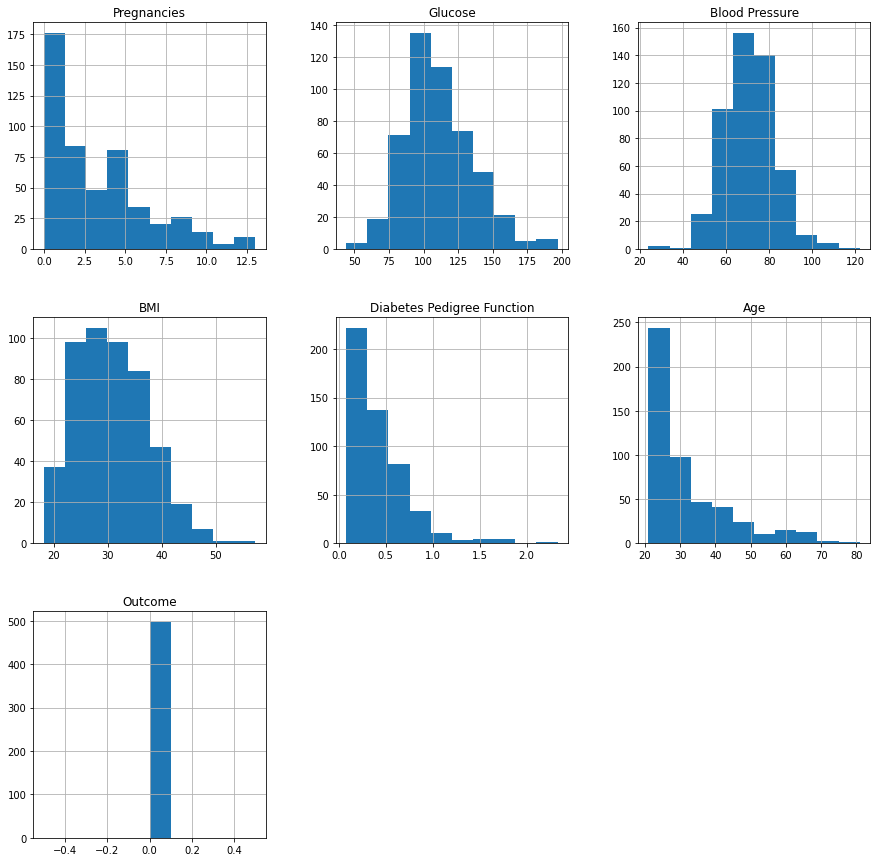

In [463]:
Knn_Non_Diabetic_df.hist(figsize=(15,15))

The above plot will give us the basic idea of non Diabetic data distributation after using Knn imputations

In [464]:
import plotly.express as px

In [465]:
# Pregnancies data distributation of NonDiabetic data

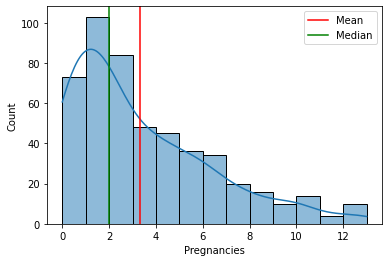

In [466]:
sns.histplot(Knn_Non_Diabetic_df["Pregnancies"],kde=True)
plt.axvline(Knn_Non_Diabetic_df["Pregnancies"].mean(),color="r",label="Mean")
plt.axvline(Knn_Non_Diabetic_df["Pregnancies"].median(),color="g",label="Median")
plt.legend()
plt.show()

From the above Pregnancies data distribuation it seems data is right skewed

In [467]:
from scipy import stats

**Finding outliers using Z SCORE**

In [468]:
z=np.abs(stats.zscore(Knn_Non_Diabetic_df["Pregnancies"]))
z

0      0.766043
1      0.766043
2      0.559364
3      2.216123
4      0.228013
         ...   
492    1.884771
493    2.216123
494    0.434691
495    0.559364
496    0.766043
Name: Pregnancies, Length: 497, dtype: float64

In [469]:
np.where(z>3)
# Zscore > 3 Sd

(array([ 10,  51, 168, 328, 484]),)

In [470]:
np.where(z<-3)
# Zscore<-3 Sd

(array([], dtype=int64),)

In [471]:
Knn_Non_Diabetic_df.iloc[[ 10,  51, 168, 328, 484]]

,Pregnancies,Glucose,Blood Pressure,BMI,Diabetes Pedigree Function,Age,Outcome
10,13.0,145.0,82.0,22.2,0.245,57.0,0.0
51,13.0,106.0,72.0,36.6,0.178,45.0,0.0
168,13.0,106.0,70.0,34.2,0.251,52.0,0.0
328,13.0,76.0,60.0,32.8,0.180,41.0,0.0
484,13.0,153.0,88.0,40.6,1.174,39.0,0.0


Though we found that 13 pregnancies as outliers from the distribution of data we observed that this out is not by Mistake it is due ti varience.
By dropping those observations or by treating it as missing we lose some some information. Hence leaving those observation as it is. We can use the transformation techniques when ever required

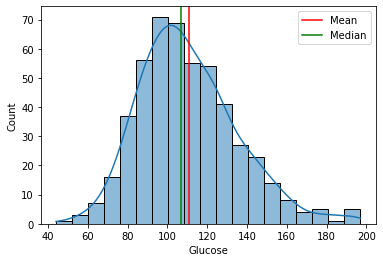

In [472]:
# Distribution of Glucose values
sns.histplot(Knn_Non_Diabetic_df["Glucose"],kde=True)
plt.axvline(Knn_Non_Diabetic_df["Glucose"].mean(),color="r",label="Mean")
plt.axvline(Knn_Non_Diabetic_df["Glucose"].median(),color="g",label="Median")
plt.legend()
plt.show()

As we observe it is almost symmetric 
assuming not to touch outliers as they were because of varience

**Finding outliers using Z SCORE**

In [473]:
z=np.abs(stats.zscore(Knn_Non_Diabetic_df["Glucose"]))
z

0      1.036033
1      0.874430
2      0.216392
3      0.175992
4      0.026013
         ...   
492    0.874430
493    0.389620
494    0.458797
495    0.418397
496    0.712827
Name: Glucose, Length: 497, dtype: float64

In [474]:
np.where(z>3)

(array([139, 158, 159, 306, 351]),)

In [475]:
np.where(z<-3)

(array([], dtype=int64),)

Though found  few outliers for Glucose variable but as the data was almost symmetrically distributed there fore not touching the outliers

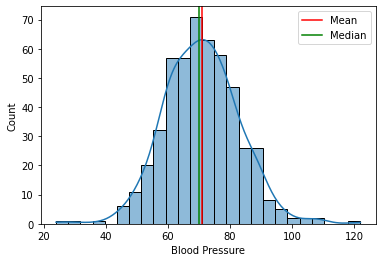

In [476]:
sns.histplot(Knn_Non_Diabetic_df["Blood Pressure"],kde=True)
plt.axvline(Knn_Non_Diabetic_df["Blood Pressure"].mean(),color="r",label="Mean")
plt.axvline(Knn_Non_Diabetic_df["Blood Pressure"].median(),color="g",label="Median")
plt.legend()
plt.show()

From above wer can observe that though data symmetrically distributed it seems there are some values as Blood Pressure having <40, which was not as usual thing there for need to work on that

**Finding Outliers using Z SCORE for Blood preassure**

In [477]:
z=np.abs(stats.zscore(Knn_Non_Diabetic_df["Blood Pressure"]))
z

0      0.406466
1      0.406466
2      0.258781
3      0.420585
4      1.755587
         ...   
492    0.739089
493    0.425093
494    0.073842
495    0.092470
496    0.073842
Name: Blood Pressure, Length: 497, dtype: float64

In [478]:
np.where(z>3)

(array([  6,  67, 220, 351, 387]),)

In [479]:
Knn_Non_Diabetic_df.iloc[[ 6,  67, 220, 351, 387]]

,Pregnancies,Glucose,Blood Pressure,BMI,Diabetes Pedigree Function,Age,Outcome
6,1.0,103.0,30.0,43.3,0.183,33.0,0.0
67,1.0,96.0,122.0,22.4,0.207,27.0,0.0
220,5.0,103.0,108.0,39.2,0.305,65.0,0.0
351,4.0,189.0,110.0,28.5,0.680,37.0,0.0
387,1.0,89.0,24.0,27.8,0.559,21.0,0.0


In [480]:
Knn_Non_Diabetic_df.shape
# Shape of nonDiabetics data after imputation

(497, 7)

In [481]:
Knn_Non_Diabetic_df[Knn_Non_Diabetic_df["Blood Pressure"]<=40]

,Pregnancies,Glucose,Blood Pressure,BMI,Diabetes Pedigree Function,Age,Outcome
6,1.0,103.0,30.0,43.3,0.183,33.0,0.0
387,1.0,89.0,24.0,27.8,0.559,21.0,0.0
388,1.0,109.0,38.0,23.1,0.407,26.0,0.0


In [482]:
Knn_Non_Diabetic_df["Blood Pressure"].iloc[[6,388,387]]=np.nan

In [483]:
Knn_Non_Diabetic_df.dropna(inplace=True)
Knn_Non_Diabetic_df.reset_index(drop=True,inplace=True)

In [484]:
Knn_Non_Diabetic_df.shape

(494, 7)

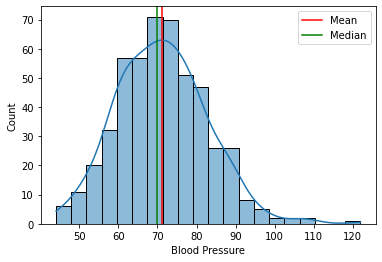

In [485]:
sns.histplot(Knn_Non_Diabetic_df["Blood Pressure"],kde=True)
plt.axvline(Knn_Non_Diabetic_df["Blood Pressure"].mean(),color="r",label="Mean")
plt.axvline(Knn_Non_Diabetic_df["Blood Pressure"].median(),color="g",label="Median")
plt.legend()
plt.show()

As we see that Blood Pressure having <40 will not be a usual scenario hence dropeed observation having Blood Pressure <40

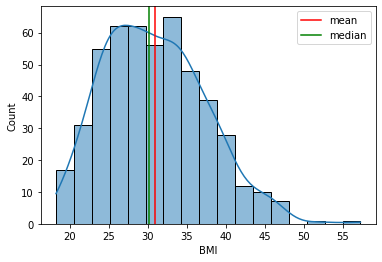

In [486]:
# Distributtion of BMI variable
sns.histplot(Knn_Non_Diabetic_df["BMI"],kde=True)
plt.axvline(Knn_Non_Diabetic_df["BMI"].mean(),color="r",label="mean")
plt.axvline(Knn_Non_Diabetic_df["BMI"].median(),color="g",label="median")
plt.legend()
plt.show()

**Finding Outliers using IQR**

In [487]:
q1=np.percentile(Knn_Non_Diabetic_df["BMI"],25,interpolation="midpoint")
q2=np.percentile(Knn_Non_Diabetic_df["BMI"],50,interpolation="midpoint")
q3=np.percentile(Knn_Non_Diabetic_df["BMI"],75,interpolation="midpoint")

In [488]:
IQR=q3-q1
print("IQR is :",IQR)
low_limit=q1-1.5*IQR
print("low_lmt is :",low_limit)
upper_lmt=q3+1.5*IQR
print("upper_lmt is :",upper_lmt)
outlier=[]
for x in Knn_Non_Diabetic_df["BMI"]:
  if ((x>upper_lmt) or (x<low_limit)):
    outlier.append(x)
print(outlier)

IQR is : 9.449999999999996
low_lmt is : 11.675000000000008
upper_lmt is : 49.474999999999994
[52.3, 57.3]


In [489]:
Knn_Non_Diabetic_df[Knn_Non_Diabetic_df["BMI"]==52.3]

,Pregnancies,Glucose,Blood Pressure,BMI,Diabetes Pedigree Function,Age,Outcome
148,0.0,165.0,90.0,52.3,0.427,23.0,0.0


In [490]:
Knn_Non_Diabetic_df[Knn_Non_Diabetic_df["BMI"]==57.3]

,Pregnancies,Glucose,Blood Pressure,BMI,Diabetes Pedigree Function,Age,Outcome
436,3.0,123.0,100.0,57.3,0.88,22.0,0.0


AS we found two outliers therfore dropeed those observations

In [491]:
Knn_Non_Diabetic_df.drop(index=[148,436],axis=0,inplace=True)
Knn_Non_Diabetic_df.reset_index(drop=True,inplace=True)

In [492]:
Knn_Non_Diabetic_df.shape

(492, 7)

In [493]:
#Distributation of BMI

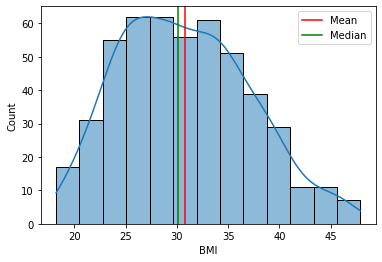

In [494]:
sns.histplot(Knn_Non_Diabetic_df["BMI"],kde=True)
plt.axvline(Knn_Non_Diabetic_df["BMI"].mean(),color="r",label="Mean")
plt.axvline(Knn_Non_Diabetic_df["BMI"].median(),color="g",label="Median")
plt.legend()
plt.show()

As we see now the data seems almost symetrical

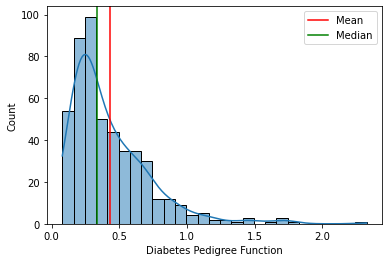

In [495]:
# Distribution of Diabetes Pedigree Function variable
sns.histplot(Knn_Non_Diabetic_df["Diabetes Pedigree Function"],kde=True)
plt.axvline(Knn_Non_Diabetic_df["Diabetes Pedigree Function"].mean(),color="r",label="Mean")
plt.axvline(Knn_Non_Diabetic_df["Diabetes Pedigree Function"].median(),color="g",label="Median")
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


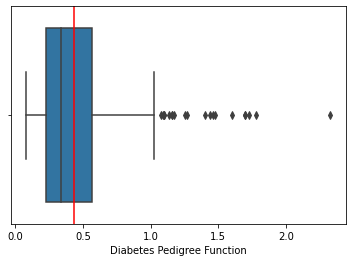

In [496]:
sns.boxplot(Knn_Non_Diabetic_df["Diabetes Pedigree Function"])
plt.axvline(Knn_Non_Diabetic_df["Diabetes Pedigree Function"].mean(),color="r")
plt.show()

**Finding outliersw using Z SCORE**

In [497]:
z=np.abs(stats.zscore(Knn_Non_Diabetic_df["Diabetes Pedigree Function"]))
z

0      0.263570
1      0.877090
2      0.763722
3      0.987124
4      0.797066
         ...   
487    0.960449
488    0.863753
489    0.300248
490    0.617011
491    0.383606
Name: Diabetes Pedigree Function, Length: 492, dtype: float64

In [498]:
np.where(z>3)
# Having Z Score >3

(array([  5,  30,  92, 138, 197, 223, 240, 382, 398, 399]),)

In [499]:
np.where(z<-3)
# Having Z Score <-3

(array([], dtype=int64),)

In [500]:
Knn_Non_Diabetic_df["Diabetes Pedigree Function"].iloc[[5,  30,  92, 138, 197, 223, 240, 382, 398, 399]]=np.nan

Found 10 Outliers

In [501]:
Knn_Non_Diabetic_df.isnull().sum()

Pregnancies                    0
Glucose                        0
Blood Pressure                 0
BMI                            0
Diabetes Pedigree Function    10
Age                            0
Outcome                        0
dtype: int64

In [502]:
Knn_Non_Diabetic_df.shape
# nondiabetic data shape after i,putation

(492, 7)

**Replacing outliers by using KNN method**

In [503]:
from fancyimpute import KNN
knn_imputer = KNN()
imp_Knn_Non_Diabetic_df= Knn_Non_Diabetic_df.copy(deep=True)
imp_Knn_Non_Diabetic_df.iloc[:, :] =knn_imputer.fit_transform(imp_Knn_Non_Diabetic_df)

Imputing row 1/492 with 0 missing, elapsed time: 0.051
Imputing row 101/492 with 0 missing, elapsed time: 0.053
Imputing row 201/492 with 0 missing, elapsed time: 0.053
Imputing row 301/492 with 0 missing, elapsed time: 0.055
Imputing row 401/492 with 0 missing, elapsed time: 0.055


In [504]:
imp_Knn_Non_Diabetic_df.isnull().sum()

Pregnancies                   0
Glucose                       0
Blood Pressure                0
BMI                           0
Diabetes Pedigree Function    0
Age                           0
Outcome                       0
dtype: int64

In [505]:
#imp_Knn_Diabetic_df["Diabetes Pedigree Function"]

Replaced the out liers found by Z score for Diabetes Pedigree Function column by using KNN method

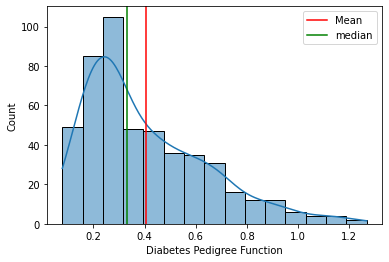

In [506]:
sns.histplot(imp_Knn_Non_Diabetic_df["Diabetes Pedigree Function"],kde=True)
plt.axvline(imp_Knn_Non_Diabetic_df["Diabetes Pedigree Function"].mean(),color="r",label="Mean")
plt.axvline(imp_Knn_Non_Diabetic_df["Diabetes Pedigree Function"].median(),color="g",label="median")
plt.legend()
plt.show()

As we can see Even after dealing with maximum outliers for Diabetes Pedigree Function column it seems right skwed

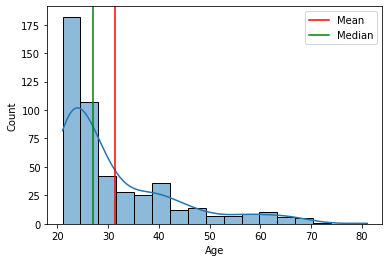

In [507]:
# Distribution of Age column
sns.histplot(imp_Knn_Non_Diabetic_df["Age"],kde=True)
plt.axvline(imp_Knn_Non_Diabetic_df["Age"].mean(),color="r",label="Mean")
plt.axvline(imp_Knn_Non_Diabetic_df["Age"].median(),color="g",label="Median")
plt.legend()
plt.show()

**Finding Outliers using Z score**

In [508]:
z=np.abs(stats.zscore(imp_Knn_Non_Diabetic_df["Age"]))
z

0      0.026576
1      0.881178
2      0.112036
3      0.197496
4      0.112036
         ...   
487    0.144344
488    2.708151
489    0.368417
490    0.112036
491    0.710258
Name: Age, Length: 492, dtype: float64

In [509]:
np.where(z>3)

(array([ 76, 275, 279, 304, 343, 435, 440]),)

In [510]:
np.where(z<-3)

(array([], dtype=int64),)

In [511]:
imp_Knn_Non_Diabetic_df.iloc[[76, 275, 279, 304, 343, 435, 440]]

,Pregnancies,Glucose,Blood Pressure,BMI,Diabetes Pedigree Function,Age,Outcome
76,5.0,132.0,80.000000,26.800000,0.186,69.0,0.0
275,2.0,119.0,82.652122,19.600000,0.832,72.0,0.0
279,9.0,134.0,74.000000,25.900000,0.460,81.0,0.0
304,8.0,194.0,80.000000,26.100000,0.551,67.0,0.0
343,0.0,57.0,60.000000,21.700000,0.735,67.0,0.0
435,8.0,91.0,82.000000,35.600000,0.587,68.0,0.0
440,5.0,136.0,82.000000,28.301292,0.640,69.0,0.0


AS we see there are some out liers found in the Age column but that is no due to mistake 
*  As thses were because of varience and we found 7 observations, if we try to replace those ao if we try to drop those it will affect the results, there fore leaving those 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f651a38af10>,
      dtype=object)

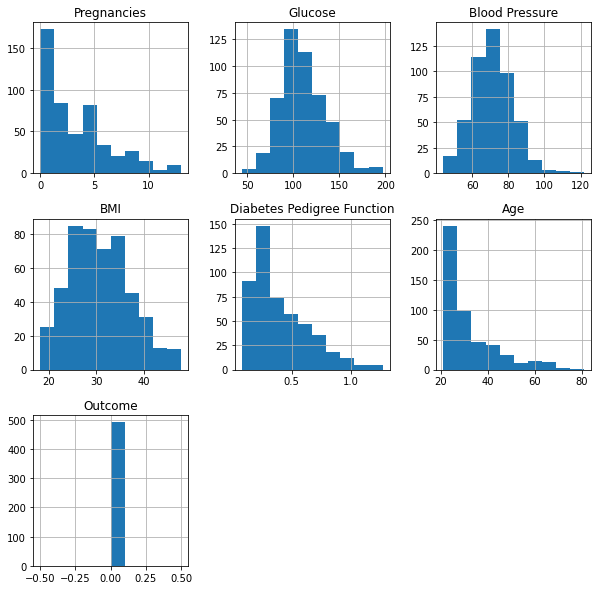

In [512]:
imp_Knn_Non_Diabetic_df.hist(figsize=(10,10))

From the above plot we  will get basic idea of data distribution after dealing with outliers

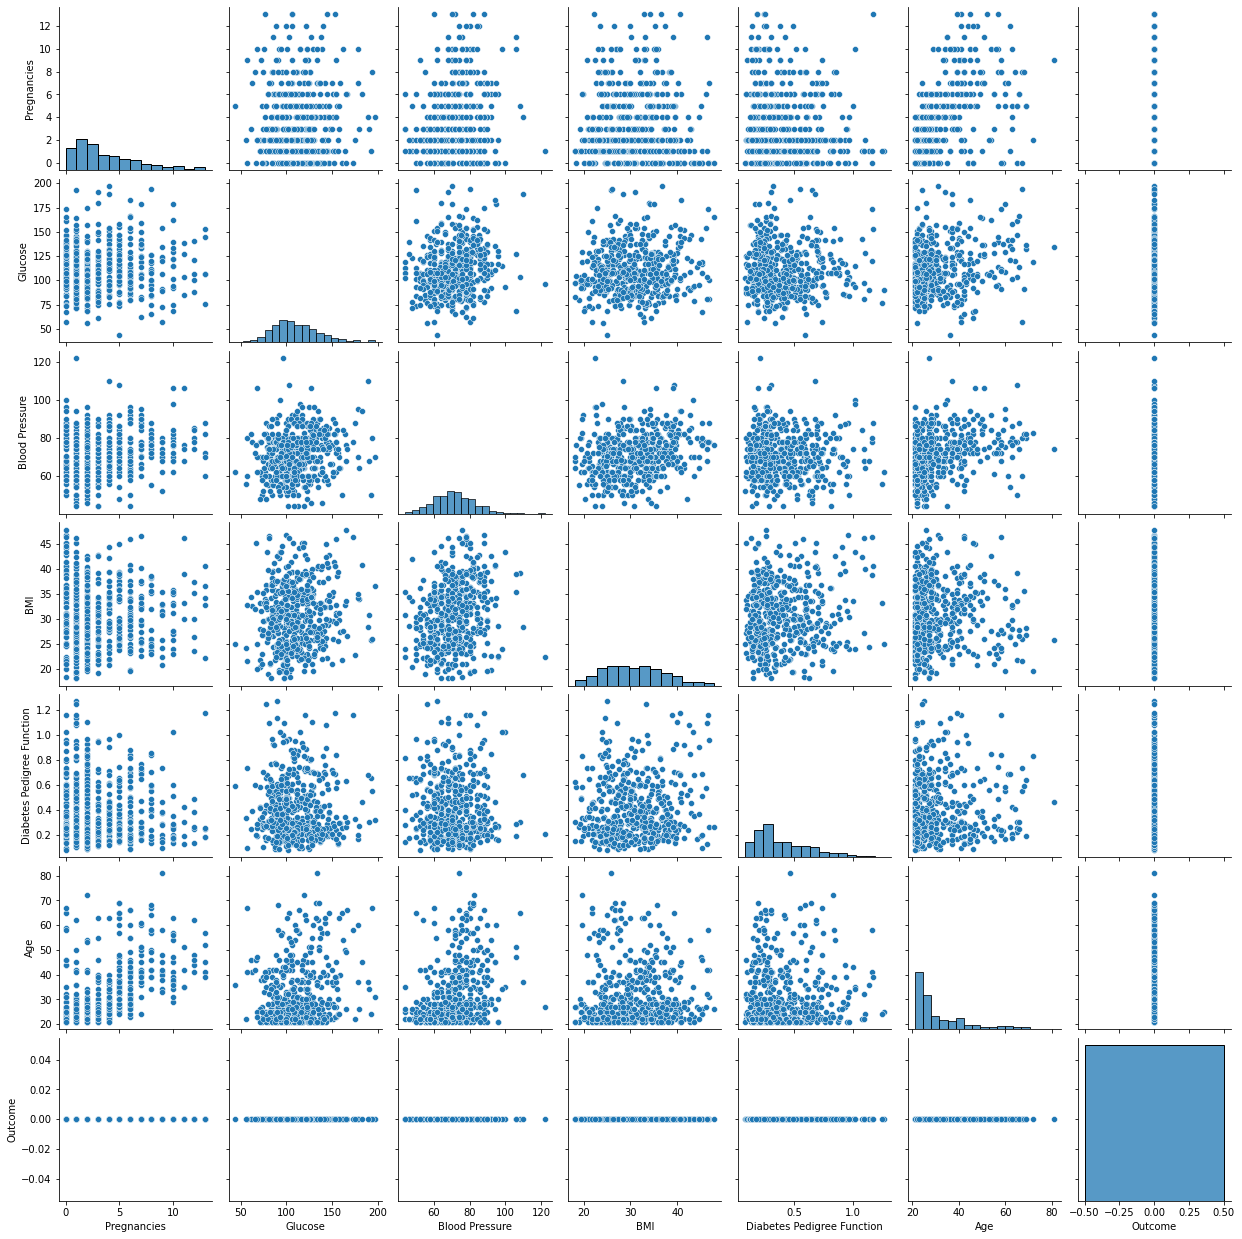

In [513]:
sns.pairplot(imp_Knn_Non_Diabetic_df)
# To see the pair plot of the Non Diabetic data

As we see there is no linear relation ship found between variable as per pair plot Hence we will go with spearman correlation matrix a correlation matrix which gives the correlation between features

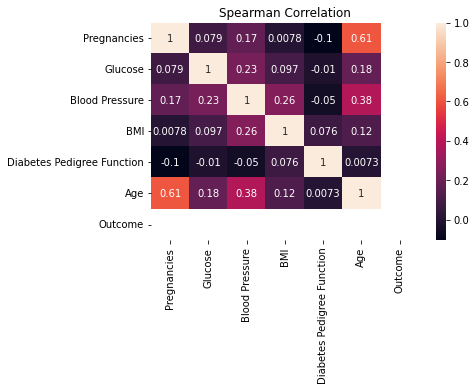

,Pregnancies,Glucose,Blood Pressure,BMI,Diabetes Pedigree Function,Age,Outcome
Pregnancies,1.000000,0.078937,0.172813,0.007778,-0.103594,0.609530,NaN
Glucose,0.078937,1.000000,0.228365,0.096752,-0.010383,0.181819,NaN
Blood Pressure,0.172813,0.228365,1.000000,0.263218,-0.049614,0.382828,NaN
BMI,0.007778,0.096752,0.263218,1.000000,0.075727,0.123484,NaN
Diabetes Pedigree Function,-0.103594,-0.010383,-0.049614,0.075727,1.000000,0.007312,NaN
Age,0.609530,0.181819,0.382828,0.123484,0.007312,1.000000,NaN
Outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [514]:
corr = imp_Knn_Non_Diabetic_df.corr(method = "spearman")
sns.heatmap(corr, annot = True)
plt.title("Spearman Correlation")
plt.show()
corr

From the above we can see that there is some +ve correlation Between Age and Pregnancies and also for Bloodpressure

# Dividing the data related to Diabetic persons as a Dataset

In [515]:
#Treating data related to Diabetics as saperate poulation for missing values and for outliers

In [516]:
Diabetic_df=new_Diabetes_df1[new_Diabetes_df1["Outcome"]==1]
Diabetic_df.reset_index(drop=True,inplace=True)
Diabetic_df

,Pregnancies,Glucose,Blood Pressure,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,8,183.0,64.0,23.3,0.672,32,1
2,0,137.0,40.0,43.1,2.288,33,1
3,3,78.0,50.0,31.0,0.248,26,1
4,2,197.0,70.0,30.5,0.158,53,1
...,...,...,...,...,...,...,...
261,1,128.0,88.0,36.5,1.057,37,1
262,0,123.0,72.0,36.3,0.258,52,1
263,6,190.0,92.0,35.5,0.278,66,1
264,9,170.0,74.0,44.0,0.403,43,1


In [517]:
Diabetic_df.shape

(266, 7)

There are 266 rows and 7 columns for Diabetic population

In [518]:
Diabetic_df.isnull().sum()
# to get the sum of null values

Pregnancies                    0
Glucose                        0
Blood Pressure                16
BMI                            2
Diabetes Pedigree Function     0
Age                            0
Outcome                        0
dtype: int64

In [519]:
Diabetic_df.isnull().mean()*100
# To get the % ofNull values

Pregnancies                   0.000000
Glucose                       0.000000
Blood Pressure                6.015038
BMI                           0.751880
Diabetes Pedigree Function    0.000000
Age                           0.000000
Outcome                       0.000000
dtype: float64

**Using KNN Imputation for filling the Missing values**

In [520]:
from fancyimpute import KNN
knn_imputer = KNN()
Knn_Diabetic_df = Diabetic_df.copy(deep=True)
Knn_Diabetic_df.iloc[:, :] = knn_imputer.fit_transform(Knn_Diabetic_df)

Imputing row 1/266 with 0 missing, elapsed time: 0.019
Imputing row 101/266 with 0 missing, elapsed time: 0.021
Imputing row 201/266 with 0 missing, elapsed time: 0.023


In [521]:
# Filled the miising value using Knn imputation

**Using MICE Imputation for filling missing valkues**

In [522]:
MICE_imputer = IterativeImputer()
MICE_Diabetic_df = Diabetic_df.copy(deep=True)
MICE_Diabetic_df.iloc[:, :] = MICE_imputer.fit_transform(MICE_Diabetic_df)

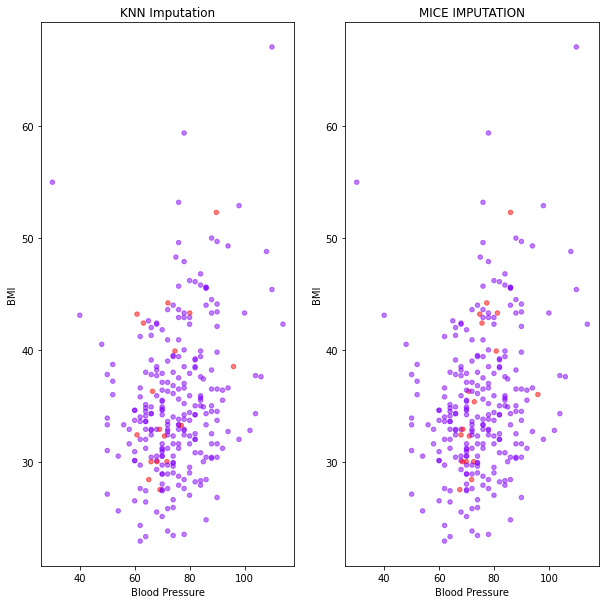

In [523]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
nullity = Diabetic_df['Blood Pressure'].isnull() + Diabetic_df['BMI'].isnull()
imputations = {'KNN Imputation': Knn_Diabetic_df,
               'MICE IMPUTATION':MICE_Diabetic_df}

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(x='Blood Pressure', y='BMI', kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
                             colorbar=False, title=df_key)

AS we  see that both the KNN and MICE imputations were spread accurately.
So we can choose any impution as both were sread similarly

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f651a52fbe0>,
      dtype=object)

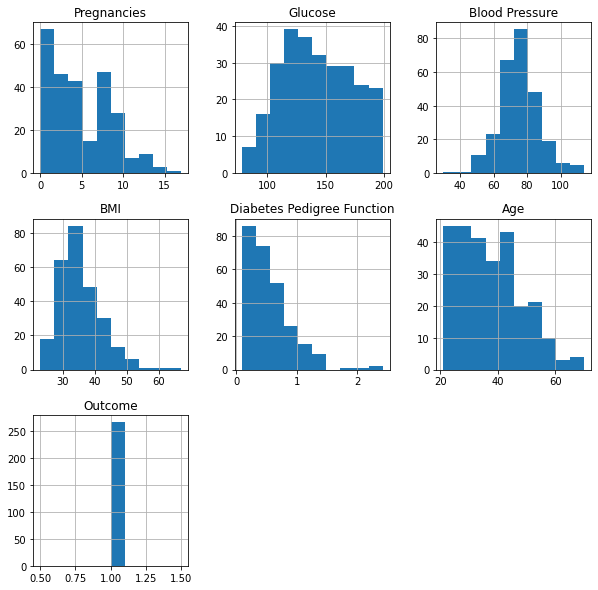

In [524]:
Knn_Diabetic_df.hist(figsize=(10,10))

Basic view of distributation of Data after filling the missing values using KNN technique

In [525]:
Knn_Diabetic_df.shape
# shape of Diabetic population

(266, 7)

There are 266 Rows and 7 columns for Diabetic population

In [526]:
Knn_Diabetic_df.describe(include="all")

,Pregnancies,Glucose,Blood Pressure,BMI,Diabetes Pedigree Function,Age,Outcome
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.0
mean,4.860902,142.319549,75.029531,35.375790,0.550605,37.052632,1.0
std,3.754672,29.599199,12.149747,6.606379,0.373388,11.006904,0.0
min,0.000000,78.000000,30.000000,22.900000,0.088000,21.000000,1.0
25%,1.250000,119.000000,68.000000,30.900000,0.261500,28.000000,1.0
50%,4.000000,140.000000,74.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,38.509410,0.728750,44.000000,1.0
max,17.000000,199.000000,114.000000,67.100000,2.420000,70.000000,1.0


# Handling outliers

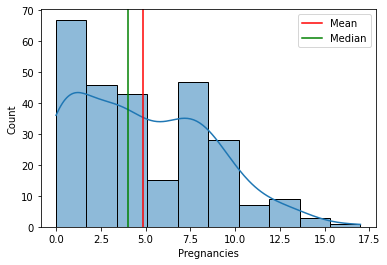

In [527]:
# Distributation of Pregnencies variable for Diabetic population
sns.histplot(Knn_Diabetic_df["Pregnancies"],kde=True)
plt.axvline(Knn_Diabetic_df["Pregnancies"].mean(),color="r",label="Mean")
plt.axvline(Knn_Diabetic_df["Pregnancies"].median(),color="g",label="Median")
plt.legend()
plt.show()

**Finding outliers using Z SCORE**

In [528]:
z=np.abs(stats.zscore(Knn_Diabetic_df["Pregnancies"]))
z

0      0.303953
1      0.837627
2      1.297068
3      0.496557
4      0.763394
         ...   
261    1.030231
262    1.297068
263    0.303953
264    1.104464
265    1.030231
Name: Pregnancies, Length: 266, dtype: float64

In [529]:
np.where(z>3)
# Having Z Score >3

(array([56]),)

In [530]:
np.where(z<-3)
# Having Z Score <-3

(array([], dtype=int64),)

In [531]:
Knn_Diabetic_df.iloc[[56]]

,Pregnancies,Glucose,Blood Pressure,BMI,Diabetes Pedigree Function,Age,Outcome
56,17.0,163.0,72.0,40.9,0.817,47.0,1.0


In [532]:
Knn_Diabetic_df.shape

(266, 7)

As we see found one out lier for Pregnancies column for Non_Diabetic data
but that was not by mistake and tried removing the outlier but still didnot get the effective distribution. Hence leaving this to perform some transformation techniques at last

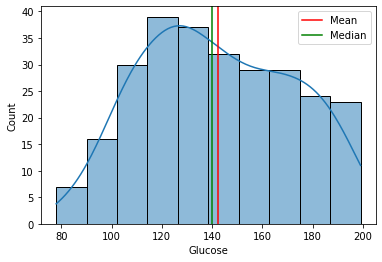

In [533]:
# Distributation of Glucose variable
sns.histplot(Knn_Diabetic_df["Glucose"],kde=True)
plt.axvline(Knn_Diabetic_df["Glucose"].mean(),color="r",label="Mean")
plt.axvline(Knn_Diabetic_df["Glucose"].median(),color="g",label="Median")
plt.legend()
plt.show()

**Finding outliers using Z SCORE**

In [534]:
# Using Z score
z=np.abs(stats.zscore(Knn_Diabetic_df["Glucose"]))
z

0      0.192274
1      1.376967
2      0.180058
3      2.177113
4      1.850845
         ...   
261    0.484694
262    0.653935
263    1.613906
264    0.936938
265    0.552390
Name: Glucose, Length: 266, dtype: float64

In [535]:
np.where(z>3)

(array([], dtype=int64),)

In [536]:
np.where(z<-3)

(array([], dtype=int64),)

As we see the distribution of Glucose column is almost symmmetric and no outliers found by Z Score technique. Hence not touching the Glucose distribution

In [537]:
# TO see the distributation of Blood Pressure

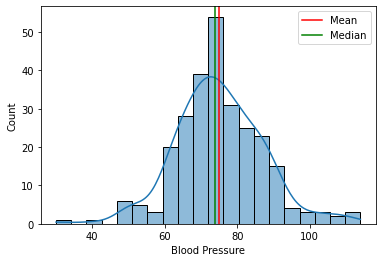

In [538]:
sns.histplot(Knn_Diabetic_df["Blood Pressure"],kde=True)
plt.axvline(Knn_Diabetic_df["Blood Pressure"].mean(),color="r",label="Mean")
plt.axvline(Knn_Diabetic_df["Blood Pressure"].median(),color="g",label="Median")
plt.legend()
plt.show()

As we see above though it seems almost symmetric but assuming having Blood Pressure <40 not being a regular scenario. Hence droped  observation having Blood Pressure <40

**To see outliers using Z SCORE**

In [539]:
z=np.abs(stats.zscore(Knn_Diabetic_df["Blood Pressure"]))
z

0      0.249819
1      0.909510
2      2.888584
3      2.063970
4      0.414742
         ...   
261    1.069563
262    0.249819
263    1.399408
264    0.084897
265    1.239356
Name: Blood Pressure, Length: 266, dtype: float64

In [540]:
np.where(z<-3)

(array([], dtype=int64),)

In [541]:
np.where(z>3)

(array([ 46, 235]),)

In [542]:
Knn_Diabetic_df[Knn_Diabetic_df["Blood Pressure"]<=40]

,Pregnancies,Glucose,Blood Pressure,BMI,Diabetes Pedigree Function,Age,Outcome
2,0.0,137.0,40.0,43.1,2.288,33.0,1.0
46,1.0,88.0,30.0,55.0,0.496,26.0,1.0


As Blood Pressure having less than 40 will not be usual case hence treating it as outliers and dropping them

In [543]:
Knn_Diabetic_df.drop(index=[2,46],inplace=True)
Knn_Diabetic_df.reset_index(drop=True,inplace=True)
                         

In [544]:
Knn_Non_Diabetic_df.shape

(492, 7)

Too see the distribution of Blood Pressure for Diabetic

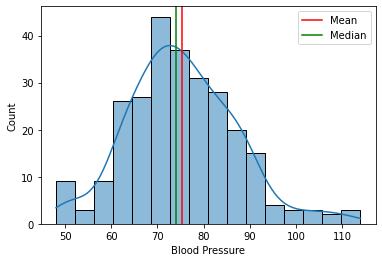

In [545]:
sns.histplot(Knn_Diabetic_df["Blood Pressure"],kde=True)
plt.axvline(Knn_Diabetic_df["Blood Pressure"].mean(),color="r",label="Mean")
plt.axvline(Knn_Diabetic_df["Blood Pressure"].median(),color="g",label="Median")
plt.legend()
plt.show()

After droping observations having Blood Pressure < 40 even now it seems the distribution is mostly symmetrical

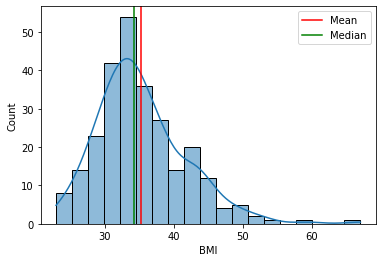

In [546]:
sns.histplot(Knn_Diabetic_df["BMI"],kde=True)
plt.axvline(Knn_Diabetic_df["BMI"].mean(),color="r",label="Mean")
plt.axvline(Knn_Diabetic_df["BMI"].median(),color="g",label="Median")
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


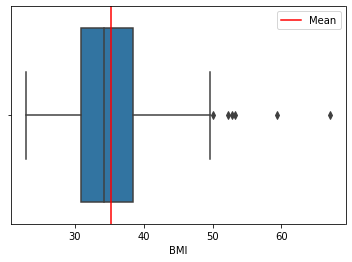

In [547]:
sns.boxplot(Knn_Diabetic_df["BMI"])
plt.axvline(Knn_Diabetic_df["BMI"].mean(),color="r",label="Mean")
plt.legend()
plt.show()

**Using Z SCORE to find the outliers**


In [548]:
z=np.abs(stats.zscore(Knn_Diabetic_df["BMI"]))
z

0      0.257676
1      1.844846
2      0.658321
3      0.735368
4      0.499319
         ...   
259    0.189197
260    0.158378
261    0.035103
262    1.344904
263    0.797006
Name: BMI, Length: 264, dtype: float64

In [549]:
np.where(z>3)
# Z SCORE >3

(array([ 60, 167]),)

In [550]:
np.where(z<-3)
# Z SCORE <-3

(array([], dtype=int64),)

In [551]:
Knn_Diabetic_df.iloc[[ 60, 167]]

,Pregnancies,Glucose,Blood Pressure,BMI,Diabetes Pedigree Function,Age,Outcome
60,0.0,129.0,110.0,67.1,0.319,26.0,1.0
167,0.0,180.0,78.0,59.4,2.420,25.0,1.0


As we that though the BMI distribution looks symmetric found 2 outliers using Z score AS the volume of Non Diabetic data become  less there not dropping the observations directly before which looking for the distribution of Diabetes Pedigree Function column and then trying to assume the those as missing and per form necessary imputations

In [552]:
Knn_Diabetic_df["BMI"].iloc[[ 60, 167]]=np.nan

In [553]:
Knn_Diabetic_df["BMI"].isnull().sum()

2

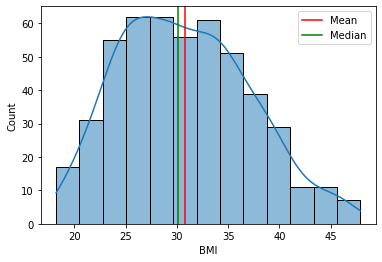

In [554]:

sns.histplot(imp_Knn_Non_Diabetic_df["BMI"],kde=True)
plt.axvline(imp_Knn_Non_Diabetic_df["BMI"].mean(),color="r",label="Mean")
plt.axvline(imp_Knn_Non_Diabetic_df["BMI"].median(),color="g",label="Median")
plt.legend()
plt.show()

As we see the BMI variable distributation is mostly symmetric

In [555]:
# TO see the distribution of Diabetes Pedigree Function

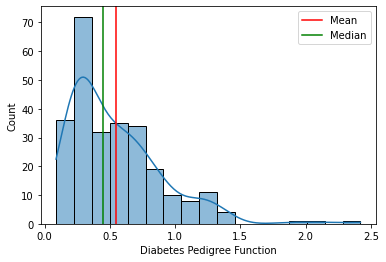

In [556]:
sns.histplot(Knn_Diabetic_df["Diabetes Pedigree Function"],kde=True)
plt.axvline(Knn_Diabetic_df["Diabetes Pedigree Function"].mean(),color="r",label="Mean")
plt.axvline(Knn_Diabetic_df["Diabetes Pedigree Function"].median(),color="g",label="Median")
plt.legend()
plt.show()

**Using Z SCORE to find outliers**

In [557]:
# Using Z SCORE 
z=np.abs(stats.zscore(Knn_Diabetic_df["Diabetes Pedigree Function"]))
z

0      0.230931
1      0.356483
2      0.826503
3      1.077609
4      0.871144
         ...   
259    1.430658
260    0.798603
261    0.742801
262    0.394044
263    0.544707
Name: Diabetes Pedigree Function, Length: 264, dtype: float64

In [558]:
np.where(z>3)

(array([ 22, 139, 167]),)

In [559]:
np.where(z<-3)

(array([], dtype=int64),)

In [560]:
Knn_Diabetic_df.iloc[[22, 139, 167]]

,Pregnancies,Glucose,Blood Pressure,BMI,Diabetes Pedigree Function,Age,Outcome
22,0.0,180.0,66.0,42.0,1.893,25.0,1.0
139,3.0,173.0,82.0,38.4,2.137,25.0,1.0
167,0.0,180.0,78.0,NaN,2.420,25.0,1.0


Found 3 outliers for Diabetes Pedigree Function variable

In [561]:
Knn_Diabetic_df["Diabetes Pedigree Function"].iloc[[[22, 139, 167]]]=np.nan

/usr/local/lib/python3.8/dist-packages/pandas/core/internals/blocks.py:981: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  values, len(values[indexer]), value  # type: ignore[arg-type]
/usr/local/lib/python3.8/dist-packages/pandas/core/internals/blocks.py:983: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  values[indexer] = value


In [562]:
Knn_Diabetic_df["Diabetes Pedigree Function"].isnull().sum()

3

Using KNN replacing the outliers for BMI and Diabetes Pedigree Function

In [563]:
from fancyimpute import KNN
knn_imputer = KNN()
imp_Knn_Diabetic_df = Knn_Diabetic_df.copy(deep=True)
imp_Knn_Diabetic_df.iloc[:, :] = knn_imputer.fit_transform(imp_Knn_Diabetic_df)

Imputing row 1/264 with 0 missing, elapsed time: 0.016
Imputing row 101/264 with 0 missing, elapsed time: 0.017
Imputing row 201/264 with 0 missing, elapsed time: 0.019


In [564]:
imp_Knn_Diabetic_df.isnull().sum()

Pregnancies                   0
Glucose                       0
Blood Pressure                0
BMI                           0
Diabetes Pedigree Function    0
Age                           0
Outcome                       0
dtype: int64

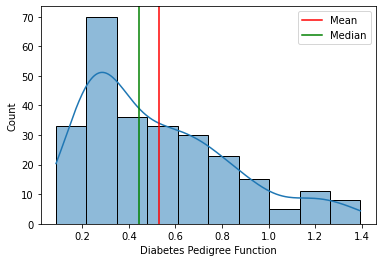

In [565]:
sns.histplot(imp_Knn_Diabetic_df["Diabetes Pedigree Function"],kde=True)
plt.axvline(imp_Knn_Diabetic_df["Diabetes Pedigree Function"].mean(),color="r",label="Mean")
plt.axvline(imp_Knn_Diabetic_df["Diabetes Pedigree Function"].median(),color="g",label="Median")
plt.legend()
plt.show()

As we see even after dealing with outliers in Diabetes Pedigree Function column by replacing using KNN imputation it seens the ditribution is right skwed

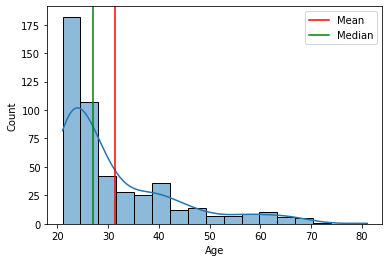

In [566]:
sns.histplot(imp_Knn_Non_Diabetic_df["Age"],kde=True)
plt.axvline(imp_Knn_Non_Diabetic_df["Age"].mean(),color="r",label="Mean")
plt.axvline(imp_Knn_Non_Diabetic_df["Age"].median(),color="g",label="Median")
plt.legend()
plt.show()

**Trying to find out the outliers for Age variable using Z SCORE**

In [567]:
z=np.abs(stats.zscore(imp_Knn_Non_Diabetic_df["Age"]))
z

0      0.026576
1      0.881178
2      0.112036
3      0.197496
4      0.112036
         ...   
487    0.144344
488    2.708151
489    0.368417
490    0.112036
491    0.710258
Name: Age, Length: 492, dtype: float64

In [568]:
np.where(z>3)

(array([ 76, 275, 279, 304, 343, 435, 440]),)

In [569]:
np.where(z<-3)

(array([], dtype=int64),)

AS we see observe that the distribution of the Age column is slightly right skwed.
And no out liers found by using Z Score 
There leaving the distribution as it is

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6518c5b520>,
      dtype=object)

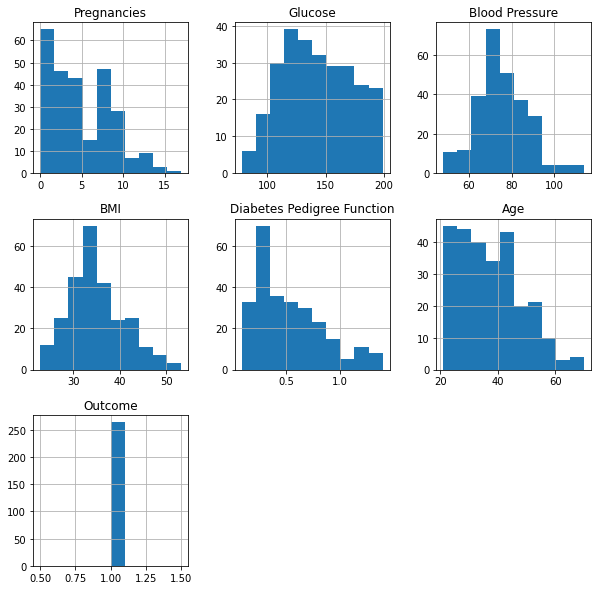

In [570]:
imp_Knn_Diabetic_df.hist(figsize=(10,10))

From the above plot we can see the basic view of Data distributation of Diabetic population

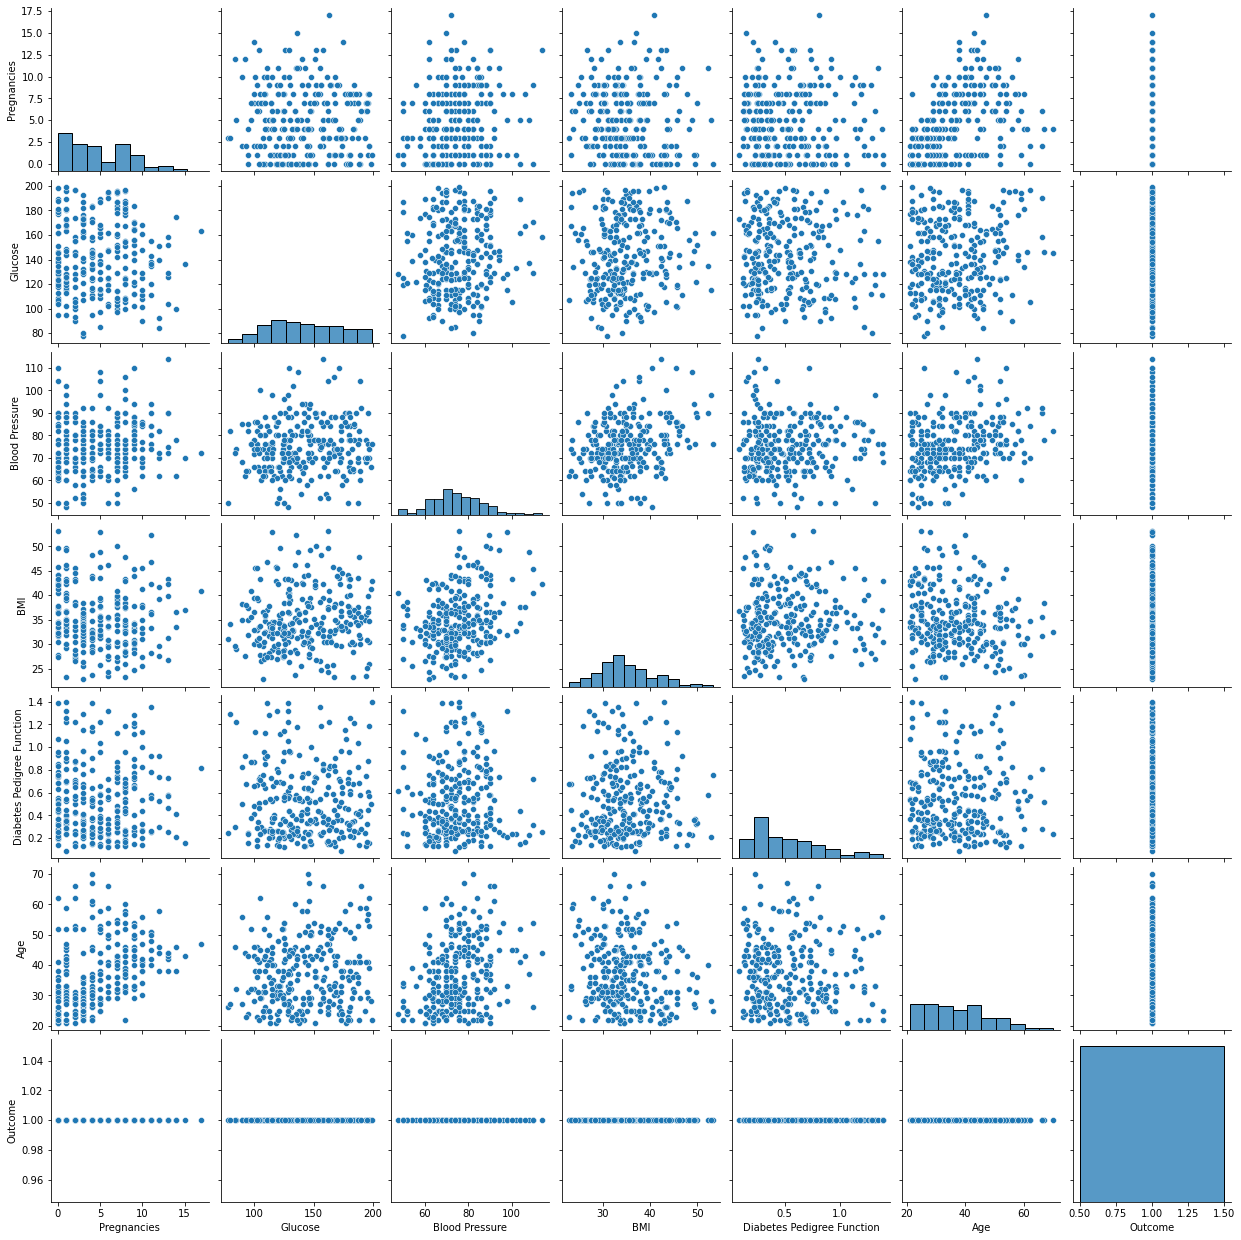

In [571]:
sns.pairplot(imp_Knn_Diabetic_df)

As we see the variables are not symmetricaally distributed hence need to use the Spearman correlation

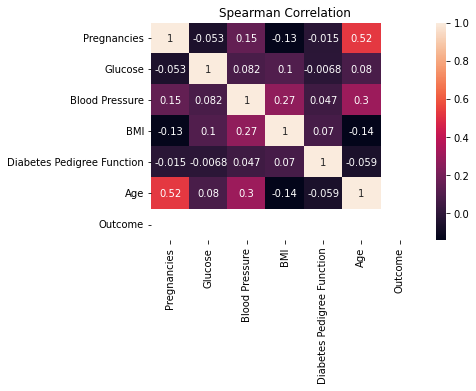

,Pregnancies,Glucose,Blood Pressure,BMI,Diabetes Pedigree Function,Age,Outcome
Pregnancies,1.000000,-0.052873,0.150067,-0.128875,-0.014747,0.524824,NaN
Glucose,-0.052873,1.000000,0.082078,0.104537,-0.006768,0.080404,NaN
Blood Pressure,0.150067,0.082078,1.000000,0.269803,0.046918,0.301549,NaN
BMI,-0.128875,0.104537,0.269803,1.000000,0.070371,-0.140404,NaN
Diabetes Pedigree Function,-0.014747,-0.006768,0.046918,0.070371,1.000000,-0.058959,NaN
Age,0.524824,0.080404,0.301549,-0.140404,-0.058959,1.000000,NaN
Outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [572]:
corr = imp_Knn_Diabetic_df.corr(method = "spearman")
sns.heatmap(corr, annot = True)
plt.title("Spearman Correlation")
plt.show()
corr

Same as for Diabetic it found that ther is some correlation between between Age and Pregnancies and for blood pressure and some relation to BMI

In [573]:
Final_Diabetes_df=imp_Knn_Non_Diabetic_df.append(imp_Knn_Diabetic_df,ignore_index=True)

In [574]:
Final_Diabetes_df

,Pregnancies,Glucose,Blood Pressure,BMI,Diabetes Pedigree Function,Age,Outcome
0,1.0,85.0,66.000000,26.6,0.351,31.0,0.0
1,1.0,89.0,66.000000,28.1,0.167,21.0,0.0
2,5.0,116.0,74.000000,25.6,0.201,30.0,0.0
3,10.0,115.0,75.945789,35.3,0.134,29.0,0.0
4,4.0,110.0,92.000000,37.6,0.191,30.0,0.0
...,...,...,...,...,...,...,...
751,1.0,128.0,88.000000,36.5,1.057,37.0,1.0
752,0.0,123.0,72.000000,36.3,0.258,52.0,1.0
753,6.0,190.0,92.000000,35.5,0.278,66.0,1.0
754,9.0,170.0,74.000000,44.0,0.403,43.0,1.0


In [575]:
Final_Diabetes_df["Outcome"]=Final_Diabetes_df["Outcome"].astype("category")

In [576]:
Final_Diabetes_df.describe(include="all")

,Pregnancies,Glucose,Blood Pressure,BMI,Diabetes Pedigree Function,Age,Outcome
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,2.0
top,NaN,NaN,NaN,NaN,NaN,NaN,0.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,492.0
mean,3.878307,121.736772,72.535965,32.271510,0.448460,33.335979,NaN
std,3.377919,30.572476,11.776669,6.558854,0.275143,11.799016,NaN
min,0.000000,44.000000,44.000000,18.200000,0.078000,21.000000,NaN
25%,1.000000,99.000000,64.000000,27.500000,0.240750,24.000000,NaN
50%,3.000000,117.000000,72.000000,32.150000,0.365500,29.000000,NaN
75%,6.000000,141.000000,80.000000,36.500000,0.605259,41.000000,NaN


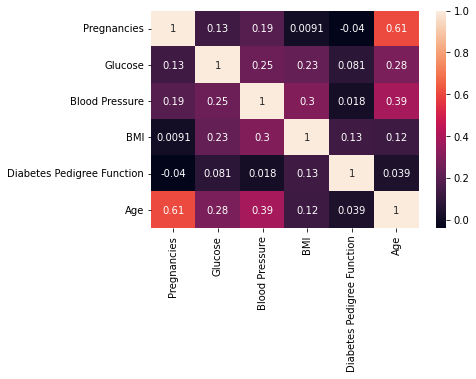

,Pregnancies,Glucose,Blood Pressure,BMI,Diabetes Pedigree Function,Age
Pregnancies,1.000000,0.131016,0.193532,0.009142,-0.040500,0.607450
Glucose,0.131016,1.000000,0.245880,0.230088,0.081400,0.284216
Blood Pressure,0.193532,0.245880,1.000000,0.300660,0.017851,0.387413
BMI,0.009142,0.230088,0.300660,1.000000,0.130911,0.123999
Diabetes Pedigree Function,-0.040500,0.081400,0.017851,0.130911,1.000000,0.039192
Age,0.607450,0.284216,0.387413,0.123999,0.039192,1.000000


In [577]:
corr = Final_Diabetes_df.corr(method = "spearman")
sns.heatmap(corr, annot = True)
plt.show()
corr

AS we see the correlation of final data it seems that Blood Pressure,BMI,Glucose also has some correlation

In [578]:
Final_Diabetes_df1=Final_Diabetes_df.copy()

In [579]:
Final_Diabetes_df1["Outcome"]=Final_Diabetes_df["Outcome"].map({0:"Non_Diabetic",1:"Diabetic"})

In [580]:
Final_Diabetes_df1

,Pregnancies,Glucose,Blood Pressure,BMI,Diabetes Pedigree Function,Age,Outcome
0,1.0,85.0,66.000000,26.6,0.351,31.0,Non_Diabetic
1,1.0,89.0,66.000000,28.1,0.167,21.0,Non_Diabetic
2,5.0,116.0,74.000000,25.6,0.201,30.0,Non_Diabetic
3,10.0,115.0,75.945789,35.3,0.134,29.0,Non_Diabetic
4,4.0,110.0,92.000000,37.6,0.191,30.0,Non_Diabetic
...,...,...,...,...,...,...,...
751,1.0,128.0,88.000000,36.5,1.057,37.0,Diabetic
752,0.0,123.0,72.000000,36.3,0.258,52.0,Diabetic
753,6.0,190.0,92.000000,35.5,0.278,66.0,Diabetic
754,9.0,170.0,74.000000,44.0,0.403,43.0,Diabetic


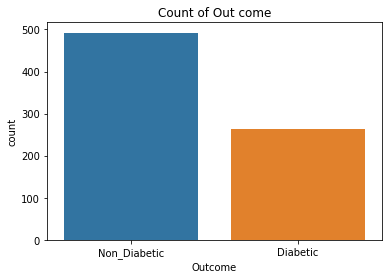

In [581]:
sns.countplot(data=Final_Diabetes_df1,x="Outcome")
plt.title("Count of Out come")
plt.show()

From the above we can see that there are more non Diabetic than the Diabetic people as **0 means Non Diabetic** and **1 means Diabetic**

To see the BOXPLOT between the variables

Text(0.5, 1.0, 'Pregnancies')

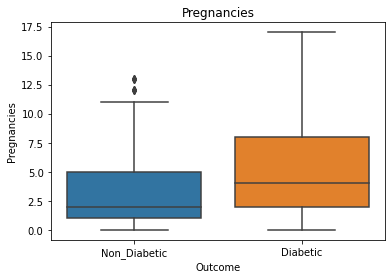

In [582]:
sns.boxplot(x ='Outcome', y ='Pregnancies', data = Final_Diabetes_df1)
plt.title("Pregnancies")

From the above it seems that Diabetic people having more pregnancies than Non Diabetic people

Text(0.5, 1.0, 'Blood Pressure')

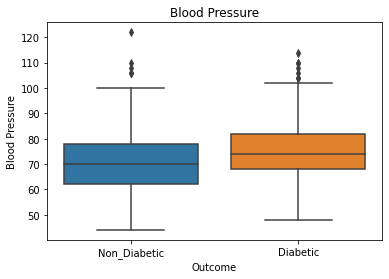

In [583]:
sns.boxplot(x ='Outcome', y ='Blood Pressure', data = Final_Diabetes_df1)
plt.title("Blood Pressure")

AS we can see that Diabetic people having slightly more blood pressure than Non Diabetic People

Text(0.5, 1.0, 'BMI')

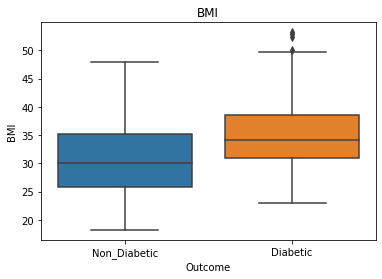

In [584]:
sns.boxplot(x ='Outcome', y ='BMI', data = Final_Diabetes_df1)
plt.title("BMI")

AS we see Diabetic people having slightly more BMI than Non Diabetic People

Text(0.5, 1.0, 'Glucose')

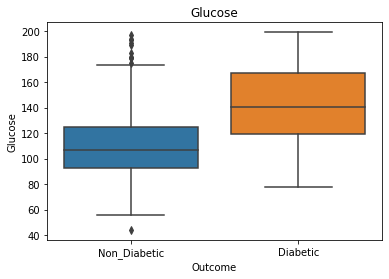

In [585]:
sns.boxplot(x ='Outcome', y ='Glucose', data = Final_Diabetes_df1)
plt.title("Glucose")

It seems a Diabetic have more glucose level than Non Diabetic

In [586]:
outcomegrp=Final_Diabetes_df1.groupby(["Outcome"])

In [587]:
outcomegrp.describe()
# Will give us the statiscal measures for Diabetic and Nondiabetic

Pregnancies                                                \
                   count      mean       std  min  25%  50%  75%   max   
Outcome                                                                  
Non_Diabetic       492.0  3.333333  3.027146  0.0  1.0  2.0  5.0  13.0   
Diabetic           264.0  4.893939  3.749287  0.0  2.0  4.0  8.0  17.0   

             Glucose              ... Diabetes Pedigree Function         \
               count        mean  ...                        75%    max   
Outcome                           ...                                     
Non_Diabetic   492.0  110.571138  ...                   0.551002  1.268   
Diabetic       264.0  142.545455  ...                   0.721250  1.394   

                Age                                                       
              count       mean        std   min   25%   50%    75%   max  
Outcome                                                                   
Non_Diabetic  492.0  31.310976  11.713260  21.0  23.0  27.0  37.00  81.0  
Diabetic      264.0  37.109848  11.024655  21.0  28.0  36.0  44.25  70.0  

[2 rows x 48 columns]

From the above we can get the no.of diabetics and Non Diabetics

we can get the average BMI and average Glucose levels and 
average Blood pressure of Diabetic population over Non Diabetic

In [590]:
outcomegrp.agg(["mean","median"])

Pregnancies            Glucose        Blood Pressure         \
                    mean median        mean median           mean median   
Outcome                                                                    
Non_Diabetic    3.333333    2.0  110.571138  107.0      71.035232   70.0   
Diabetic        4.893939    4.0  142.545455  140.5      75.332785   74.0   

                    BMI        Diabetes Pedigree Function                Age  \
                   mean median                       mean  median       mean   
Outcome                                                                        
Non_Diabetic  30.759708   30.1                   0.405573  0.3295  31.310976   
Diabetic      35.088960   34.2                   0.528384  0.4450  37.109848   

                     
             median  
Outcome              
Non_Diabetic   27.0  
Diabetic       36.0

From above we will get the mean and median of Diabetic and Non Diabetic features
*  From that we can say for features like Glucose, Blood Pressure,BMI, it seems their mean is very slightly greaterthan their median.
Hence we can say those are slightly right skewed

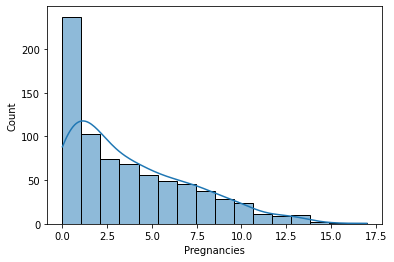

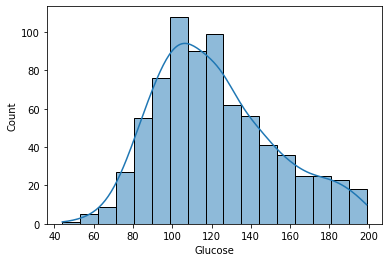

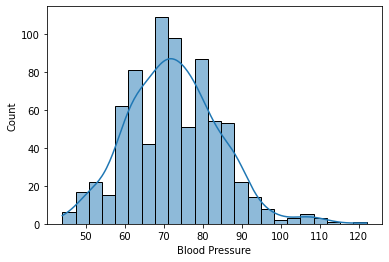

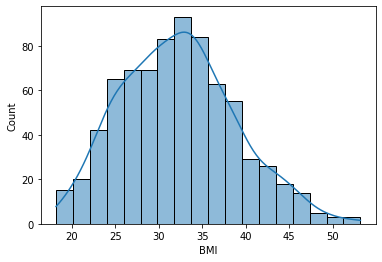

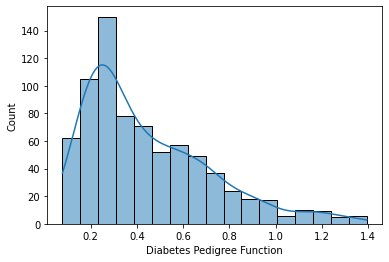

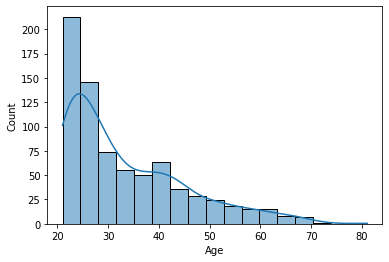

In [589]:
# Plotting Histogram to see the distribution data as a whole
for i ,col in enumerate(Final_Diabetes_df1.columns[:-1]):
  plt.figure(i)
  sns.histplot(Final_Diabetes_df1[col],kde=True);

FRom the above we got the histogram of all the features
and from that we can say that Glucose and BMI and Blood pressure are some what slighlt symmetrical

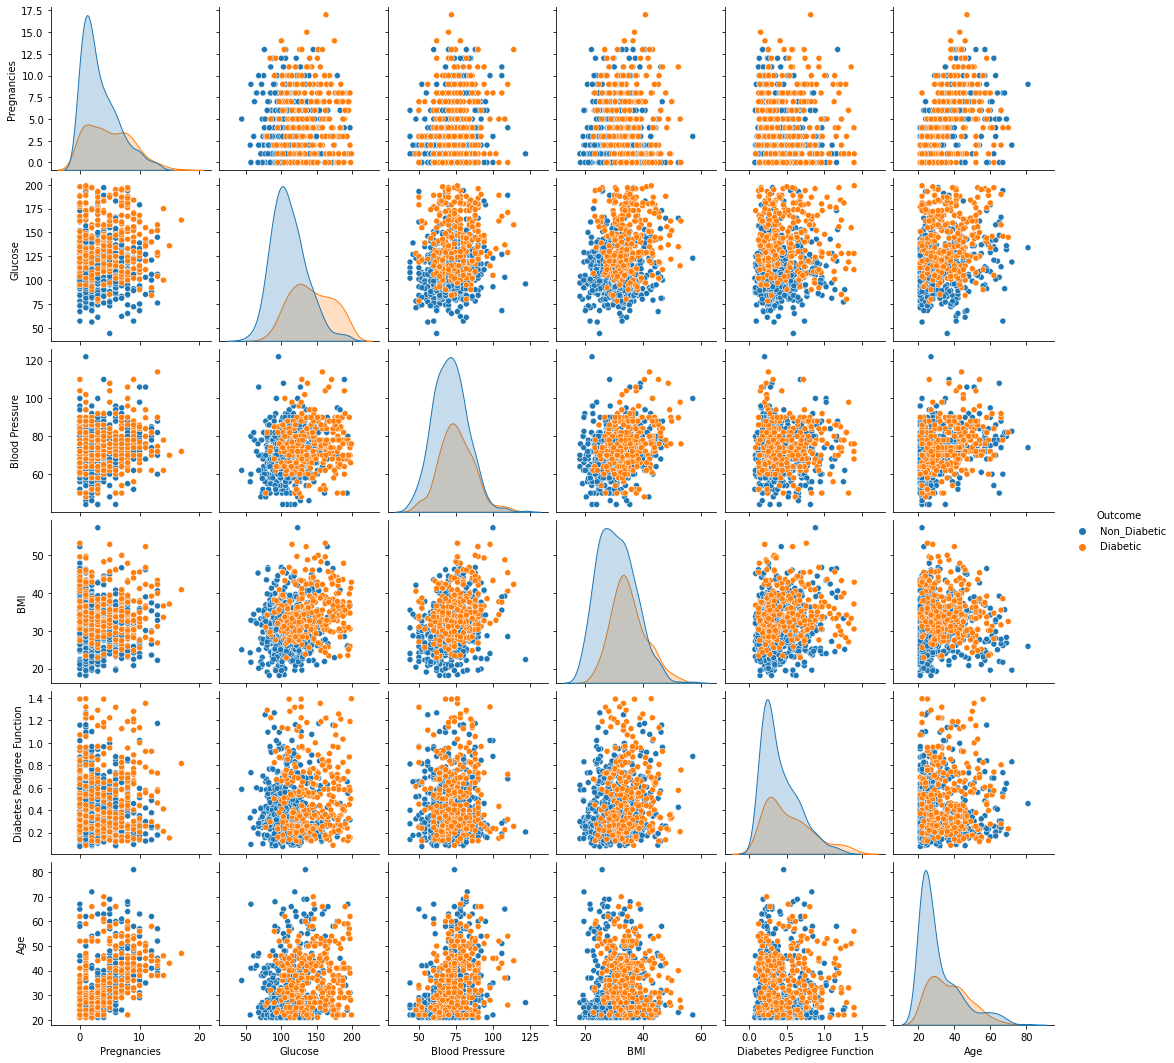

In [420]:
sns.pairplot(Final_Diabetes_df1,hue="Outcome")
# Piarplot is nithing but scatter plot between features

FRom the above plot we can say
*  Bloodpressure is some what positely related to BMI
*  Bmi is positively related to Glucose

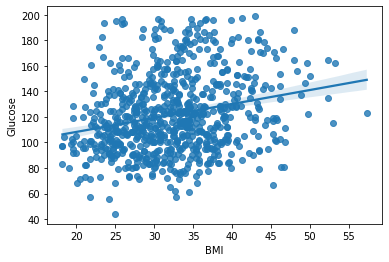

In [421]:
sns.regplot(x="BMI",y="Glucose",data=Final_Diabetes_df1)

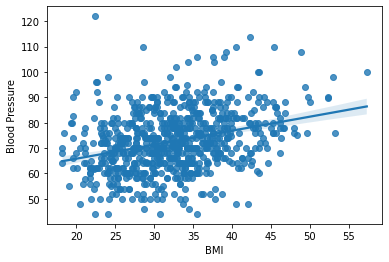

In [422]:
sns.regplot(x="BMI",y="Blood Pressure",data=Final_Diabetes_df1)

FRom above those are kind of positivwly related

**INSIGHTS**
*  There are more Non Diabetics population thanthe Diabetic
*  Diabetic people having more pregnancies than Non Diabetic
*  Diabetics were having more Bloodpressure than NonDiabetics
*  Diabetics were having more BMI than NonDiabetics
*  Diabetics were having more Glucose levels than NonDiabetics
*  The average age of the Diabetic is More than the Non Diabetic
From correlation matrix for Non Diabetic found that Age & Pregnancies,  Age&Bloodpressre ,  BMI & Bloodpressure are positively correlated
*  Glucose, BMI and Blood pressure seems to be symmetrically distributed
From correlation matrix for Diabetic population it seems Age& Pregnancies , Age&Bloodpressure, Bloodpressure&BMI are positively correlated
* Average Blood pressure of a Diabetic 75.33 is and a Non Diabetic is 71.03
* Average BMI of a Non Diabetic is 30.759 and a diabetic is 35.08